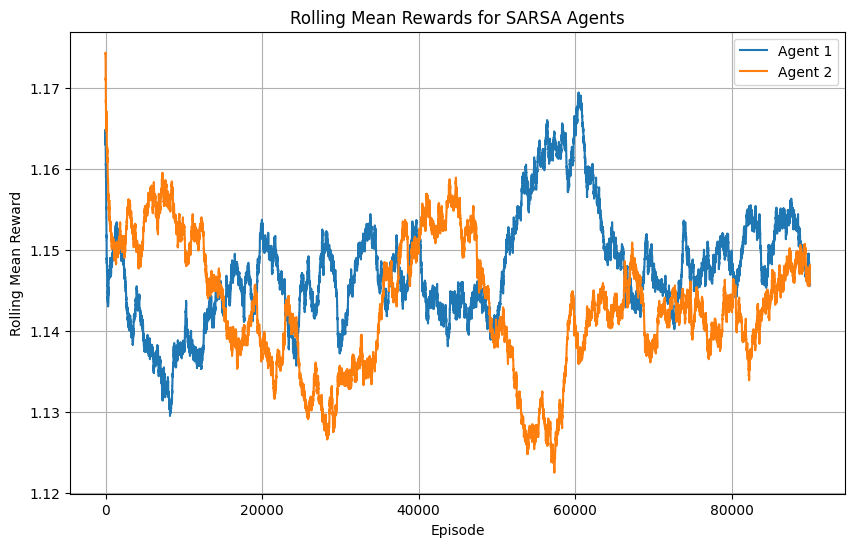

In [61]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the actions in the Prisoner's Dilemma game
COOPERATE = 0
DEFECT = 1

# SARSA Agent with Annealing Epsilon
class SARSAAgent:
    def __init__(self, initial_epsilon=1.0, min_epsilon=0.1, epsilon_decay=0.995, alpha=0.1, gamma=0.9):
        self.q_table = {}  # Q-table to store Q-values for state-action pairs
        self.epsilon = initial_epsilon  # Exploration rate
        self.min_epsilon = min_epsilon  # Minimum exploration rate
        self.epsilon_decay = epsilon_decay  # Decay rate for epsilon
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.prev_state = None
        self.prev_action = None

    def select_action(self, state):
        # Epsilon-greedy policy
        if random.random() < self.epsilon:
            action = random.choice([COOPERATE, DEFECT])  # Exploration
        else:
            # Choose the action with the highest Q-value
            if (state, COOPERATE) not in self.q_table:
                self.q_table[(state, COOPERATE)] = 0.0
            if (state, DEFECT) not in self.q_table:
                self.q_table[(state, DEFECT)] = 0.0

            q_cooperate = self.q_table[(state, COOPERATE)]
            q_defect = self.q_table[(state, DEFECT)]

            if q_cooperate > q_defect:
                action = COOPERATE
            else:
                action = DEFECT

        self.prev_state = state
        self.prev_action = action
        return action

    def update_epsilon(self):
        # Anneal epsilon over time
        if self.epsilon > self.min_epsilon:
            self.epsilon *= self.epsilon_decay

    def update_q_table(self, state, action, reward, next_state):
        if state is not None:
            if (state, action) not in self.q_table:
                self.q_table[(state, action)] = 0.0
    
            if next_state != "end":  # Check if the episode is not terminated
                if (next_state, self.select_action(next_state)) not in self.q_table:
                    self.q_table[(next_state, self.select_action(next_state))] = 0.0
    
                # Calculate the TD error and update the Q-value
                td_error = reward + self.gamma * self.q_table[(next_state, self.select_action(next_state))] - self.q_table[(state, action)]
                self.q_table[(state, action)] += self.alpha * td_error

# Define the Prisoner's Dilemma game
def play_prisoner_dilemma(agent1, agent2, num_episodes=1000):
    rewards_agent1 = []  # To track rewards for Agent 1
    rewards_agent2 = []  # To track rewards for Agent 2

    # SARSA Training Loop
    for episode in range(num_episodes):
        total_reward_agent1 = 0
        total_reward_agent2 = 0
        state = "start"  # Initialize state

        # Update epsilon for both agents
        agent1.update_epsilon()
        agent2.update_epsilon()

        while state != "end":
            action1 = agent1.select_action(state)
            action2 = agent2.select_action(state)

            if action1 == COOPERATE and action2 == COOPERATE:
                reward1 = 3
                reward2 = 3
            elif action1 == COOPERATE and action2 == DEFECT:
                reward1 = 0
                reward2 = 5
            elif action1 == DEFECT and action2 == COOPERATE:
                reward1 = 5
                reward2 = 0
            else:
                reward1 = 1
                reward2 = 1

            next_state = "end"  # Assume the episode ends after this step

            # Update Q-values for both agents
            agent1.update_q_table(state, action1, reward1, next_state)
            agent2.update_q_table(state, action2, reward2, next_state)

            total_reward_agent1 += reward1
            total_reward_agent2 += reward2

            state = next_state

        rewards_agent1.append(total_reward_agent1)
        rewards_agent2.append(total_reward_agent2)

    return rewards_agent1, rewards_agent2

# Create two SARSA agents
agent1 = SARSAAgent()
agent2 = SARSAAgent()

# Play the repeated Prisoner's Dilemma and track rewards
rewards_agent1, rewards_agent2 = play_prisoner_dilemma(agent1, agent2, num_episodes=100000)

# Calculate rolling mean using numpy
rolling_window = 10000  # Adjust the window size as needed
rolling_mean_agent1 = np.convolve(rewards_agent1, np.ones(rolling_window)/rolling_window, mode='valid')
rolling_mean_agent2 = np.convolve(rewards_agent2, np.ones(rolling_window)/rolling_window, mode='valid')

# Plot the rolling mean rewards for both agents
plt.figure(figsize=(10, 6))
plt.plot(rolling_mean_agent1, label='Agent 1')
plt.plot(rolling_mean_agent2, label='Agent 2')
plt.xlabel('Episode')
plt.ylabel('Rolling Mean Reward')
plt.legend()
plt.title('Rolling Mean Rewards for SARSA Agents')
plt.grid()
plt.show()


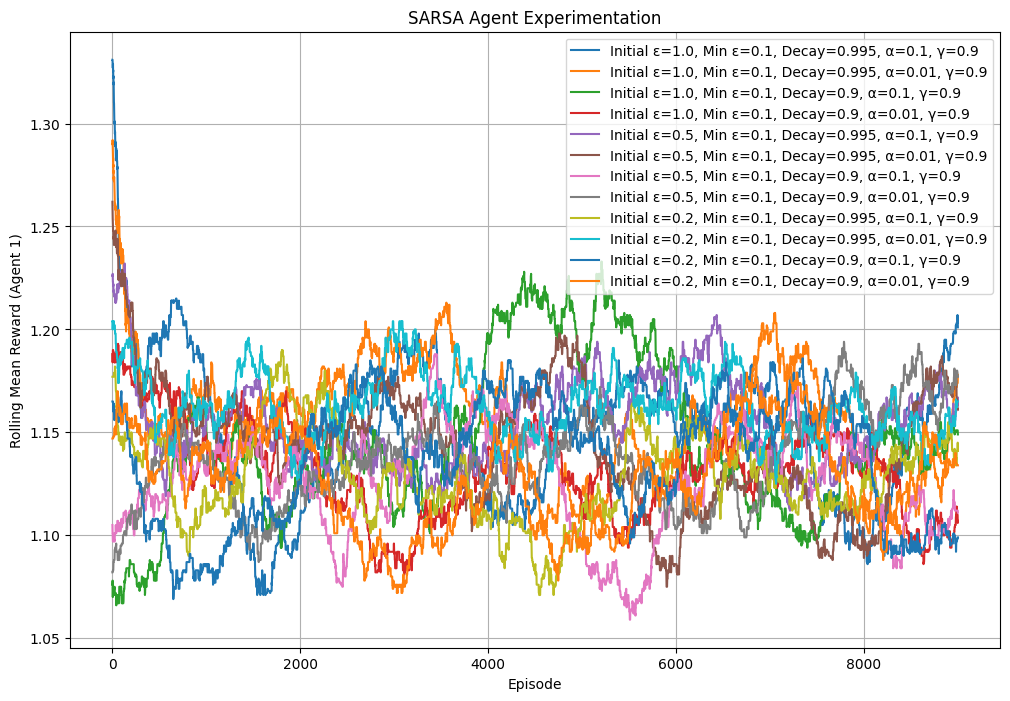

In [62]:
# Experiment with different hyperparameter values
initial_epsilons = [1.0, 0.5, 0.2]
min_epsilons = [0.1]
epsilon_decays = [0.995, 0.9]
alphas = [0.1, 0.01]
gammas = [0.9]

results = []

for initial_epsilon in initial_epsilons:
    for min_epsilon in min_epsilons:
        for epsilon_decay in epsilon_decays:
            for alpha in alphas:
                for gamma in gammas:
                    # Create SARSA agents with different hyperparameters
                    agent1 = SARSAAgent(initial_epsilon=initial_epsilon, min_epsilon=min_epsilon, epsilon_decay=epsilon_decay, alpha=alpha, gamma=gamma)
                    agent2 = SARSAAgent(initial_epsilon=initial_epsilon, min_epsilon=min_epsilon, epsilon_decay=epsilon_decay, alpha=alpha, gamma=gamma)

                    # Play the repeated Prisoner's Dilemma and track rewards
                    rewards_agent1, rewards_agent2 = play_prisoner_dilemma(agent1, agent2, num_episodes=10000)

                    results.append((initial_epsilon, min_epsilon, epsilon_decay, alpha, gamma, rewards_agent1, rewards_agent2))

# Plot the results
plt.figure(figsize=(12, 8))
for result in results:
    label = f"Initial ε={result[0]}, Min ε={result[1]}, Decay={result[2]}, α={result[3]}, γ={result[4]}"
    rolling_window = 1000  # Adjust the window size as needed
    rolling_mean_agent1 = np.convolve(result[5], np.ones(rolling_window)/rolling_window, mode='valid')
    plt.plot(rolling_mean_agent1, label=label)

plt.xlabel('Episode')
plt.ylabel('Rolling Mean Reward (Agent 1)')
plt.legend()
plt.title('SARSA Agent Experimentation')
plt.grid()
plt.show()

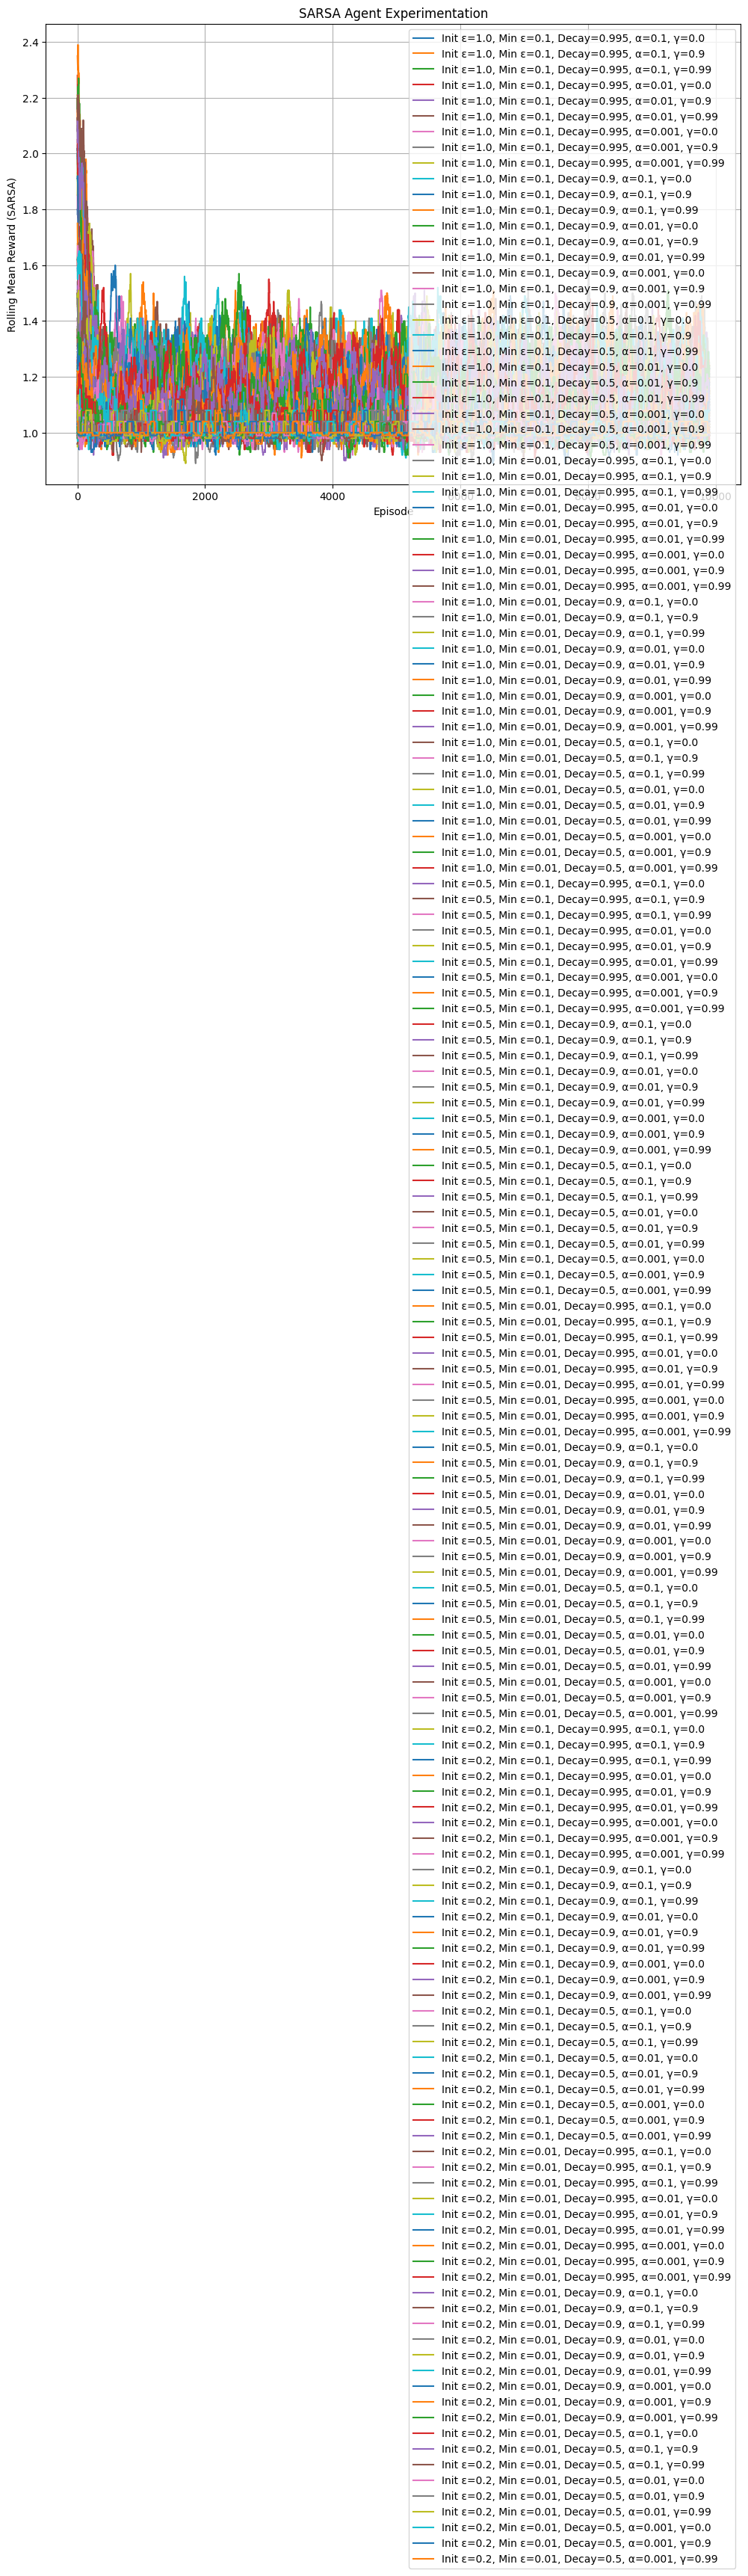

In [63]:
# Experiment with different hyperparameter values for SARSA
initial_epsilons = [1.0, 0.5, 0.2]
min_epsilons = [0.1, 0.01]
epsilon_decays = [0.995, 0.9, 0.5]
alphas = [0.1, 0.01, 0.001]
gammas = [0, 0.9, 0.99]

sarsa_results = []

for initial_epsilon in initial_epsilons:
    for min_epsilon in min_epsilons:
        for epsilon_decay in epsilon_decays:
            for alpha in alphas:
                for gamma in gammas:
                    # Create SARSA agents with different hyperparameters
                    agent1 = SARSAAgent(initial_epsilon=initial_epsilon, min_epsilon=min_epsilon, epsilon_decay=epsilon_decay, alpha=alpha, gamma=gamma)
                    agent2 = SARSAAgent(initial_epsilon=initial_epsilon, min_epsilon=min_epsilon, epsilon_decay=epsilon_decay, alpha=alpha, gamma=gamma)

                    # Play the repeated Prisoner's Dilemma and track rewards
                    rewards_agent1, rewards_agent2 = play_prisoner_dilemma(agent1, agent2, num_episodes=10000)

                    # Calculate rolling mean
                    rolling_window = 100  # Adjust the window size as needed
                    rolling_mean_agent1 = np.convolve(rewards_agent1, np.ones(rolling_window)/rolling_window, mode='valid')

                    # Calculate additional outcome variables
                    total_mean_reward_agent1 = np.mean(rewards_agent1)
                    total_std_reward_agent1 = np.std(rewards_agent1)
                    percent_above_1_5 = np.sum(np.array(rewards_agent1) > 1.5) / len(rewards_agent1)
                    last_10_percent_mean = np.mean(rewards_agent1[-int(0.1*len(rewards_agent1)):])
                    last_10_percent_std = np.std(rewards_agent1[-int(0.1*len(rewards_agent1)):])
                    rounds_to_stabilize = None
                    total_std_percent = total_std_reward_agent1 / total_mean_reward_agent1

                    if total_std_percent < 0.05:
                        rounds_to_stabilize = np.where(np.array(rewards_agent1) < 1.5)[0][0]

                    # Store results in a dictionary
                    result_dict = {
                        'init_eps': initial_epsilon,
                        'min_eps': min_epsilon,
                        'decay': epsilon_decay,
                        'alpha': alpha,
                        'gamma': gamma,
                        'rolling_mean': rolling_mean_agent1,
                        'total_mean': total_mean_reward_agent1,
                        'total_std': total_std_reward_agent1,
                        'percent_above_1.5': percent_above_1_5,
                        'last_10_mean': last_10_percent_mean,
                        'last_10_std': last_10_percent_std,
                        'rounds_to_stabilize': rounds_to_stabilize
                    }

                    sarsa_results.append(result_dict)

# Create a DataFrame from the SARSA results
sarsa_df = pd.DataFrame(sarsa_results)

# Call the function to plot and save results for SARSA
plot_and_save_results(sarsa_df, 'SARSA')


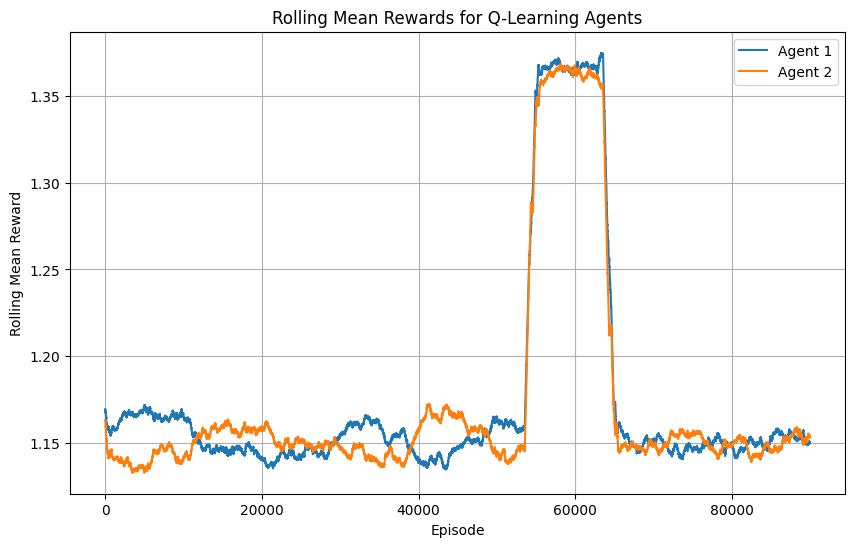

In [52]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Define the actions in the Prisoner's Dilemma game
COOPERATE = 0
DEFECT = 1

# Q-learning Agent with Annealing Epsilon
class QLearningAgent:
    def __init__(self, initial_epsilon=1.0, min_epsilon=0.1, epsilon_decay=0.995, alpha=0.1, gamma=0.9):
        self.q_table = {}  # Q-table to store Q-values for state-action pairs
        self.epsilon = initial_epsilon  # Exploration rate
        self.min_epsilon = min_epsilon  # Minimum exploration rate
        self.epsilon_decay = epsilon_decay  # Decay rate for epsilon
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor

    def select_action(self, state):
        # Epsilon-greedy policy
        if random.random() < self.epsilon:
            action = random.choice([COOPERATE, DEFECT])  # Exploration
        else:
            # Choose the action with the highest Q-value
            if (state, COOPERATE) not in self.q_table:
                self.q_table[(state, COOPERATE)] = 0.0
            if (state, DEFECT) not in self.q_table:
                self.q_table[(state, DEFECT)] = 0.0

            q_cooperate = self.q_table[(state, COOPERATE)]
            q_defect = self.q_table[(state, DEFECT)]

            if q_cooperate > q_defect:
                action = COOPERATE
            else:
                action = DEFECT

        return action

    def update_epsilon(self):
        # Anneal epsilon over time
        if self.epsilon > self.min_epsilon:
            self.epsilon *= self.epsilon_decay

    def update_q_table(self, state, action, reward, next_state):
        if (state, action) not in self.q_table:
            self.q_table[(state, action)] = 0.0  # Initialize Q-value for unseen state-action pair

        if next_state is not None:
            # Calculate the TD error and update the Q-value
            td_target = reward + self.gamma * max(self.q_table.get((next_state, COOPERATE), 0.0), self.q_table.get((next_state, DEFECT), 0.0))
            td_error = td_target - self.q_table[(state, action)]
            self.q_table[(state, action)] += self.alpha * td_error

# Define the Prisoner's Dilemma game
def play_prisoner_dilemma(agent1, agent2, num_episodes=1000):
    rewards_agent1 = []  # To track rewards for Agent 1
    rewards_agent2 = []  # To track rewards for Agent 2

    for episode in range(num_episodes):
        total_reward_agent1 = 0
        total_reward_agent2 = 0
        state = "start"
        
        agent1.update_epsilon()
        agent2.update_epsilon()

        while state != "end":
            action1 = agent1.select_action(state)
            action2 = agent2.select_action(state)

            if action1 == COOPERATE and action2 == COOPERATE:
                reward1 = 3
                reward2 = 3
            elif action1 == COOPERATE and action2 == DEFECT:
                reward1 = 0
                reward2 = 5
            elif action1 == DEFECT and action2 == COOPERATE:
                reward1 = 5
                reward2 = 0
            else:
                reward1 = 1
                reward2 = 1

            # Update Q-values for both agents
            agent1.update_q_table(state, action1, reward1, state)
            agent2.update_q_table(state, action2, reward2, state)

            total_reward_agent1 += reward1
            total_reward_agent2 += reward2

            state = "end"  # End the episode

        rewards_agent1.append(total_reward_agent1)
        rewards_agent2.append(total_reward_agent2)

    return rewards_agent1, rewards_agent2

# Create two Q-learning agents
agent1 = QLearningAgent()
agent2 = QLearningAgent()

# Play the repeated Prisoner's Dilemma and track rewards
rewards_agent1, rewards_agent2 = play_prisoner_dilemma(agent1, agent2, num_episodes=100000)

# Calculate rolling mean using numpy
rolling_window = 10000  # Adjust the window size as needed
rolling_mean_agent1 = np.convolve(rewards_agent1, np.ones(rolling_window)/rolling_window, mode='valid')
rolling_mean_agent2 = np.convolve(rewards_agent2, np.ones(rolling_window)/rolling_window, mode='valid')

# Plot the rolling mean rewards for both agents
plt.figure(figsize=(10, 6))
plt.plot(rolling_mean_agent1, label='Agent 1')
plt.plot(rolling_mean_agent2, label='Agent 2')
plt.xlabel('Episode')
plt.ylabel('Rolling Mean Reward')
plt.legend()
plt.title('Rolling Mean Rewards for Q-Learning Agents')
plt.grid()
plt.show()


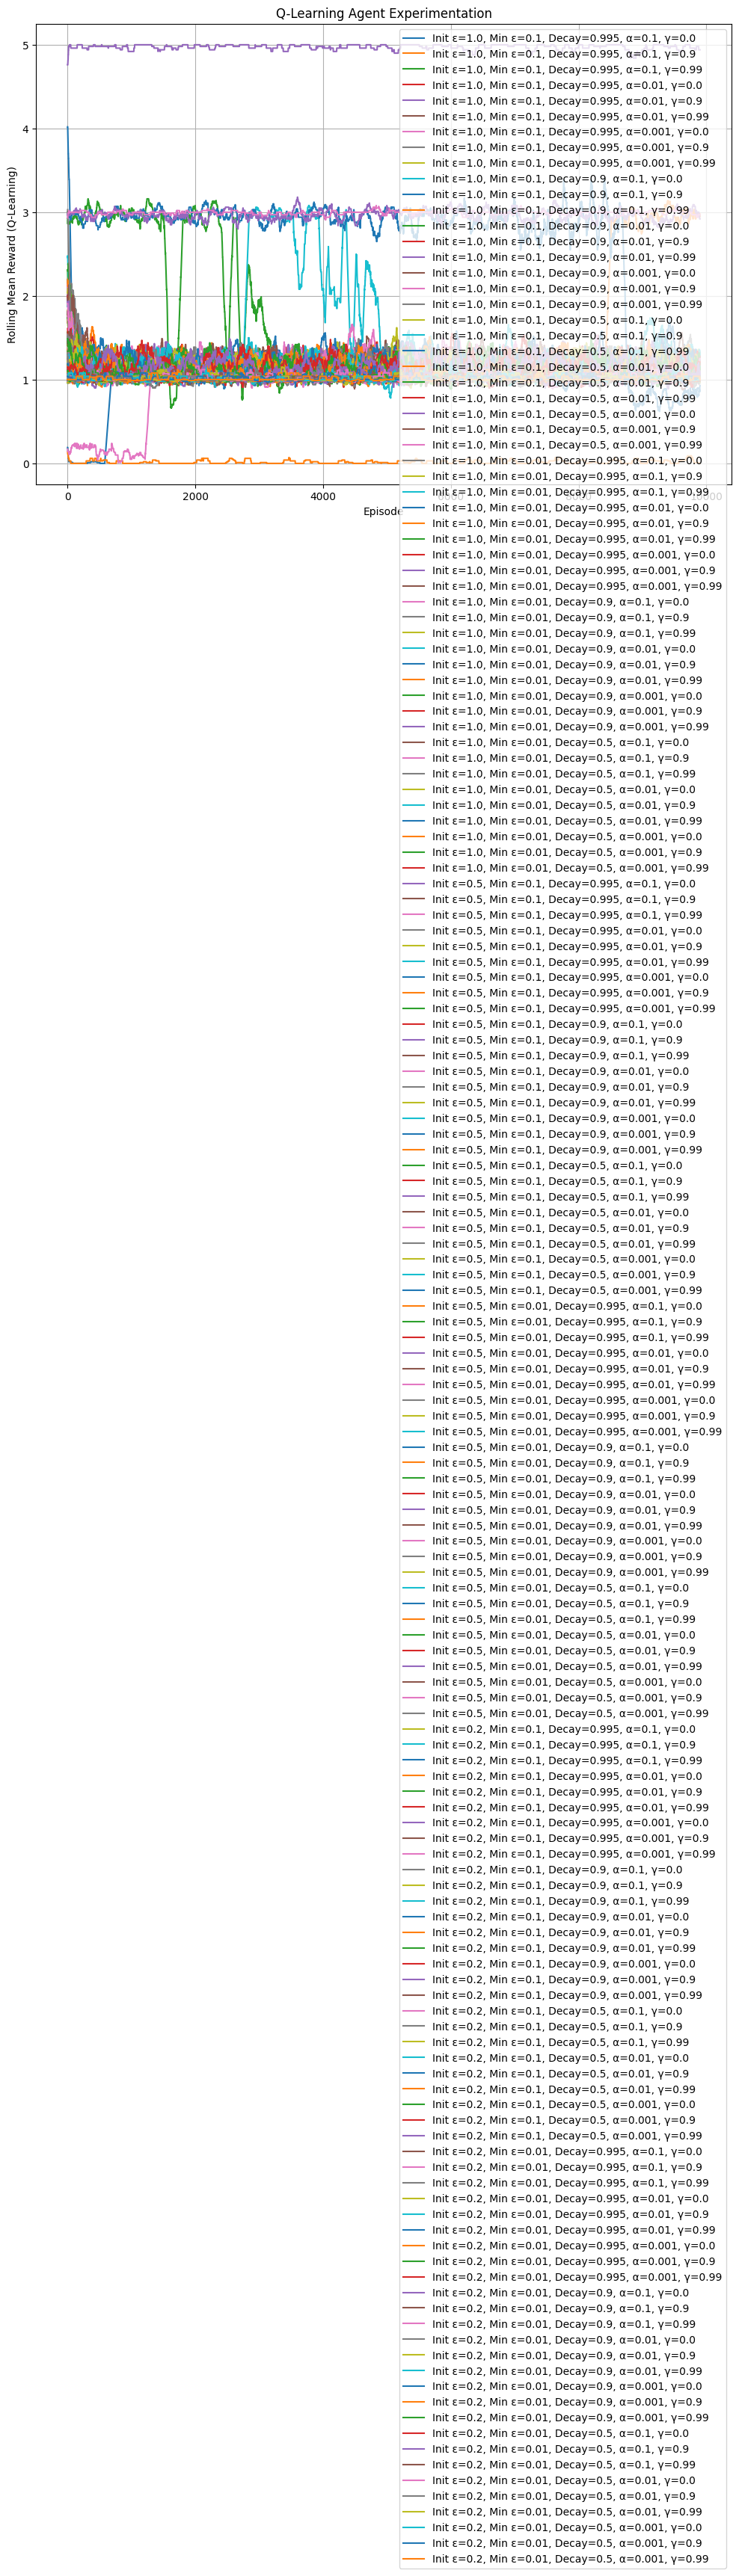

In [54]:
# Experiment with different hyperparameter values for Q-learning
initial_epsilons = [1.0, 0.5, 0.2]
min_epsilons = [0.1, 0.01]
epsilon_decays = [0.995, 0.9, 0.5]
alphas = [0.1, 0.01, 0.001]
gammas = [0, 0.9, 0.99]

results = []

for initial_epsilon in initial_epsilons:
    for min_epsilon in min_epsilons:
        for epsilon_decay in epsilon_decays:
            for alpha in alphas:
                for gamma in gammas:
                    # Create Q-learning agents with different hyperparameters
                    agent1 = QLearningAgent(initial_epsilon=initial_epsilon, min_epsilon=min_epsilon, epsilon_decay=epsilon_decay, alpha=alpha, gamma=gamma)
                    agent2 = QLearningAgent(initial_epsilon=initial_epsilon, min_epsilon=min_epsilon, epsilon_decay=epsilon_decay, alpha=alpha, gamma=gamma)

                    # Play the repeated Prisoner's Dilemma and track rewards
                    rewards_agent1, rewards_agent2 = play_prisoner_dilemma(agent1, agent2, num_episodes=10000)

                    # Calculate rolling mean
                    rolling_window = 100  # Adjust the window size as needed
                    rolling_mean_agent1 = np.convolve(rewards_agent1, np.ones(rolling_window)/rolling_window, mode='valid')

                    # Calculate additional outcome variables
                    total_mean_reward_agent1 = np.mean(rewards_agent1)
                    total_std_reward_agent1 = np.std(rewards_agent1)
                    percent_above_1_5 = np.sum(np.array(rewards_agent1) > 1.5) / len(rewards_agent1)
                    last_10_percent_mean = np.mean(rewards_agent1[-int(0.1*len(rewards_agent1)):])
                    last_10_percent_std = np.std(rewards_agent1[-int(0.1*len(rewards_agent1)):])
                    rounds_to_stabilize = None
                    total_std_percent = total_std_reward_agent1 / total_mean_reward_agent1

                    if total_std_percent < 0.05:
                        rounds_to_stabilize = np.where(np.array(rewards_agent1) < 1.5)[0][0]

                    # Store results in a dictionary
                    result_dict = {
                        'init_eps': initial_epsilon,
                        'min_eps': min_epsilon,
                        'decay': epsilon_decay,
                        'alpha': alpha,
                        'gamma': gamma,
                        'rolling_mean': rolling_mean_agent1,
                        'total_mean': total_mean_reward_agent1,
                        'total_std': total_std_reward_agent1,
                        'percent_above_1.5': percent_above_1_5,
                        'last_10_mean': last_10_percent_mean,
                        'last_10_std': last_10_percent_std,
                        'rounds_to_stabilize': rounds_to_stabilize
                    }

                    results.append(result_dict)

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Define a function to plot and save results
def plot_and_save_results(df, agent_name):
    plt.figure(figsize=(12, 8))
    for _, row in df.iterrows():
        label = f"Init ε={row['init_eps']}, Min ε={row['min_eps']}, Decay={row['decay']}, α={row['alpha']}, γ={row['gamma']}"
        plt.plot(row['rolling_mean'], label=label)

    plt.xlabel('Episode')
    plt.ylabel(f'Rolling Mean Reward ({agent_name})')
    plt.legend()
    plt.title(f'{agent_name} Agent Experimentation')
    plt.grid()
    plt.show()

    df.to_csv(f'{agent_name}_experiment_results.csv', index=False)

# Call the function to plot and save results for Q-learning
plot_and_save_results(df, 'Q-Learning')

In [55]:
df.head()

,init_eps,min_eps,decay,alpha,gamma,rolling_mean,total_mean,total_std,percent_above_1.5,last_10_mean,last_10_std,rounds_to_stabilize
0,1.0,0.1,0.995,0.10,0.00,"[2.119999999999999, 2.1299999999999994, 2.1499...",1.1763,0.953110,0.0602,1.181,0.939276,None
1,1.0,0.1,0.995,0.10,0.90,"[2.0399999999999996, 2.0499999999999994, 2.09,...",1.1870,0.978280,0.0621,1.158,0.899464,None
2,1.0,0.1,0.995,0.10,0.99,"[2.2999999999999994, 2.2599999999999993, 2.219...",1.1690,0.941084,0.0578,1.159,0.931514,None
3,1.0,0.1,0.995,0.01,0.00,"[1.6800000000000002, 1.7000000000000002, 1.700...",1.1617,0.933034,0.0560,1.133,0.869086,None
4,1.0,0.1,0.995,0.01,0.90,"[2.1099999999999994, 2.079999999999999, 2.0399...",1.1585,0.914646,0.0543,1.129,0.852267,None


In [57]:
df.drop('rolling_mean', axis = 1, inplace=True)


/econ_share/home/pp712/myenv/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


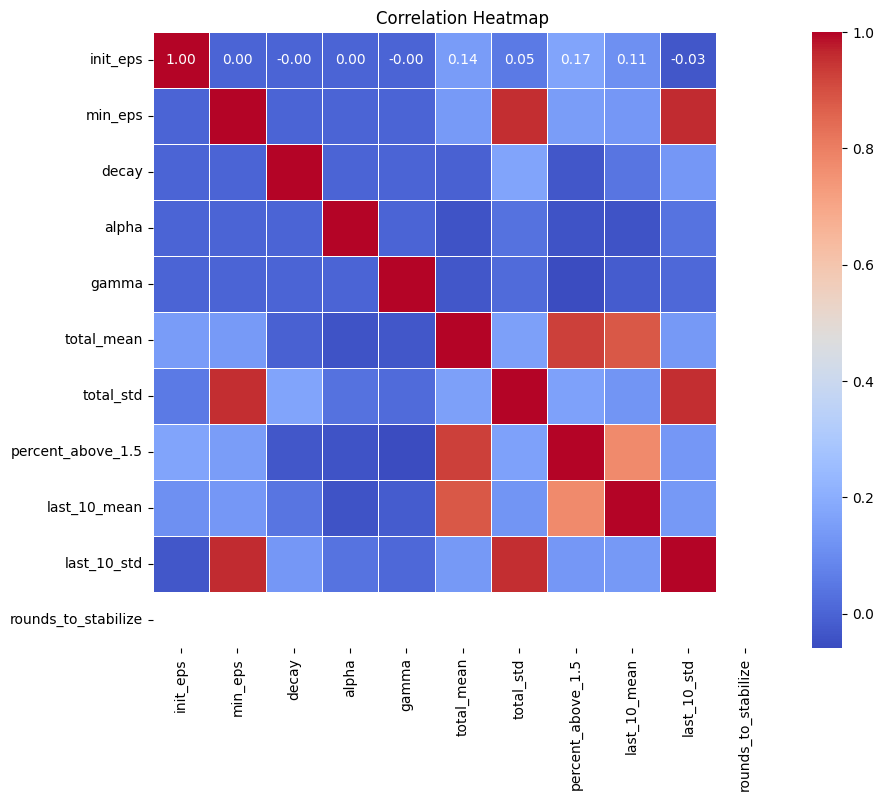

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
